In [1]:
import os
import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
import random

import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix
from PIL import Image

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D, GlobalAvgPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop, Adam

In [2]:
data = (r'C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training')

In [3]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [4]:
images[:10]

['C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\1.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\14.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\1f (1).jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\2f.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\33.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\34.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\35.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\3f.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\4f.jpg',
 'C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Fake\\500_f1.jpg']

In [5]:
len(images)

126

In [6]:
class_values = []
for i in images:
    j = i.split('\\')
    class_values.append(j[-2])

In [7]:
class_values[:10]

['Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake',
 'Fake']

In [8]:
len(class_values)

126

In [9]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [10]:
data

image_path class_label
0    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
1    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
2    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
3    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
4    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
..                                                 ...         ...
121  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
122  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
123  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
124  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
125  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real

[126 rows x 2 columns]

In [11]:
data.class_label.value_counts()

class_label
Real    105
Fake     21
Name: count, dtype: int64

In [12]:
df_c0 = data[data['class_label'] =="Fake"]
df_c1 = data[data['class_label'] =="Real"]

In [13]:
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=200)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=200)

In [14]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1])
df_unsampled

image_path class_label
115  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
33   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
36   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
37   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
36   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
..                                                 ...         ...
120  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
124  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
11   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
97   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
86   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real

[400 rows x 2 columns]

In [15]:
df_unsampled.head()

image_path class_label
115  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
33   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
36   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
37   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
36   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake

In [16]:
df_unsampled.tail()

image_path class_label
120  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
124  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
11   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
97   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
86   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real

In [17]:
df_unsampled.class_label.value_counts()

class_label
Fake    200
Real    200
Name: count, dtype: int64

In [18]:
df_unsampled.shape

(400, 2)

In [19]:
data = df_unsampled.sample(frac=1)
data.shape

(400, 2)

In [20]:
data[:10]

image_path class_label
17   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
10   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
44   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
85   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
3    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
101  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
115  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
91   C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Fake
8    C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real
108  C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\T...        Real

Text(0.5, 0, 'Class_label')

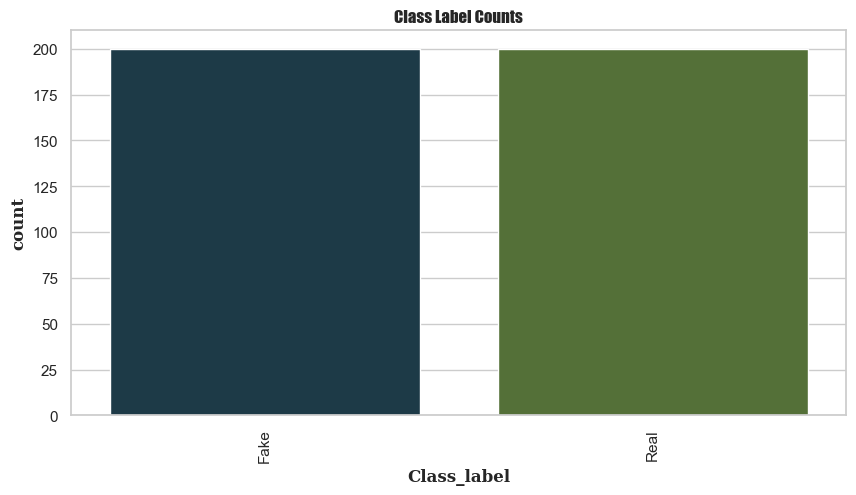

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [22]:
def resize_image(img):
    file = cv2.imread(img)
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [23]:
def resize_image(img):
    file = cv2.imread(img)
    print("START")
    print(file)
    print(img)
    print("END")
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [24]:
images=[resize_image(img) for img in data['image_path']]

START
[[[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [196 201 200]
  [196 201 200]
  [196 201 200]]

 [[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [198 203 202]
  [199 204 203]
  [199 204 203]]

 [[202 208 203]
  [202 208 203]
  [203 209 204]
  ...
  [197 202 201]
  [197 202 201]
  [198 203 202]]

 ...

 [[199 199 199]
  [199 199 199]
  [201 199 199]
  ...
  [180 185 184]
  [181 186 185]
  [182 188 187]]

 [[194 192 192]
  [191 189 189]
  [187 185 185]
  ...
  [181 186 185]
  [181 186 185]
  [182 188 187]]

 [[185 183 183]
  [182 180 180]
  [179 177 177]
  ...
  [185 190 189]
  [186 191 190]
  [185 191 190]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\1.jpg
END
START
[[[ 19  26  53]
  [ 22  28  57]
  [ 26  31  62]
  ...
  [210 217 214]
  [207 215 214]
  [206 214 213]]

 [[ 10  17  44]
  [ 16  22  51]
  [ 20  25  56]
  ...
  [209 216 213]
  [206 214 213]
  [205 213 212]]

 [[  2   6  34]
  [ 11  15  44]
  [ 15  18  49]
  ...
  [208 215 212]
  [208 214 

START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  92]]

 [[111 167 156]
  [ 99 155 144]
  [ 85 141 130]
  ...
  [  8  68  60]
  [ 12  73  63]
  [ 19  80  70]]

 ...

 [[255 253 252]
  [255 253 252]
  [255 253 252]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[255 254 253]
  [254 255 253]
  [255 254 253]
  ...
  [254 254 254]
  [254 254 254]
  [254 254 254]]

 [[254 255 251]
  [252 255 251]
  [254 255 251]
  ...
  [253 255 255]
  [252 254 254]
  [250 252 252]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\33.jpg
END
START
[[[190 178 172]
  [192 180 174]
  [195 183 177]
  ...
  [201 186 177]
  [202 187 178]
  [202 187 178]]

 [[191 179 173]
  [193 181 175]
  [195 183 177]
  ...
  [200 185 176]
  [201 186 177]
  [201 186 177]]

 [[193 181 175]
  [194 182 176]
  [195 183 177]
  ...
  [199 185 173]
  [200 186

START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146  89   4]
  [146  89   4]
  [145  88   3]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 ...

 [[112 112 118]
  [110 110 116]
  [107 107 113]
  ...
  [114 120 119]
  [114 120 119]
  [116 122 121]]

 [[110 109 118]
  [108 107 116]
  [106 105 114]
  ...
  [114 120 119]
  [113 119 118]
  [114 120 119]]

 [[104 103 112]
  [103 102 111]
  [103 102 111]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083829413.jpg_232b0b70-a8b5-421e-8d7a-b46efcb200ab.jpg
END
START
[[[254 251 253]
  [255 252 254]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 254 255]
  [255 253 255]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253

START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146  89   4]
  [146  89   4]
  [145  88   3]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 ...

 [[112 112 118]
  [110 110 116]
  [107 107 113]
  ...
  [114 120 119]
  [114 120 119]
  [116 122 121]]

 [[110 109 118]
  [108 107 116]
  [106 105 114]
  ...
  [114 120 119]
  [113 119 118]
  [114 120 119]]

 [[104 103 112]
  [103 102 111]
  [103 102 111]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083829413.jpg_232b0b70-a8b5-421e-8d7a-b46efcb200ab.jpg
END
START
[[[0 1 0]
  [3 5 5]
  [4 0 0]
  ...
  [4 2 1]
  [2 3 1]
  [1 2 0]]

 [[2 7 6]
  [0 0 0]
  [9 4 5]
  ...
  [3 1 0]
  [1 2 0]
  [1 2 0]]

 [[0 0 0]
  [0 0 0]
  [6 0 1]
  ...
  [2 0 0]
  [2 0 0]
  [3 1 0]]

 ...

 [[0

START
[[[154 152 144]
  [112 110 102]
  [ 78  76  68]
  ...
  [197 200 175]
  [194 197 172]
  [193 196 170]]

 [[125 123 115]
  [ 93  91  83]
  [103 101  93]
  ...
  [187 188 168]
  [185 186 166]
  [183 185 163]]

 [[ 82  80  72]
  [ 98  96  88]
  [146 144 136]
  ...
  [176 174 163]
  [173 171 160]
  [171 169 158]]

 ...

 [[ 94 110 127]
  [ 89 105 122]
  [ 92 108 125]
  ...
  [173 169 174]
  [156 152 157]
  [144 141 143]]

 [[ 94 110 127]
  [ 88 104 121]
  [ 91 107 124]
  ...
  [166 163 165]
  [160 157 159]
  [156 154 154]]

 [[ 94 110 127]
  [ 87 103 120]
  [ 90 106 123]
  ...
  [158 155 157]
  [156 154 154]
  [154 152 152]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150422596.jpg_0ea8e2a7-4dc1-4518-9779-086c8649dbca.jpg
END
START
[[[184 215 216]
  [192 223 224]
  [181 215 215]
  ...
  [183 217 217]
  [182 216 216]
  [182 216 216]]

 [[187 218 219]
  [186 217 218]
  [179 213 213]
  ...
  [180 214 214]
  [179 213 213]
  [180 214 214]]

 [[188

START
[[[227 218 208]
  [226 217 207]
  [226 217 207]
  ...
  [ 75  62  84]
  [ 89  72  93]
  [ 97  81  99]]

 [[226 217 207]
  [226 217 207]
  [225 216 206]
  ...
  [ 88  75  97]
  [ 95  81  99]
  [ 99  86 102]]

 [[225 216 206]
  [225 216 206]
  [224 215 205]
  ...
  [ 91  82 102]
  [ 89  79  95]
  [ 86  76  89]]

 ...

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  7   7   7]
  [  7   8   4]
  [  7   9   3]]

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  6   7   5]
  [  5   7   1]
  [  6   9   0]]

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  7   8   4]
  [  6   9   0]
  [  7  11   0]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150406750.jpg_6578c03f-b865-4830-9e24-003252f45971.jpg
END
START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163

START
[[[  3   7  18]
  [  6  10  21]
  [  7  12  21]
  ...
  [124 126 126]
  [123 125 125]
  [123 125 125]]

 [[  7  11  22]
  [  8  12  23]
  [  7  12  21]
  ...
  [123 125 125]
  [119 121 121]
  [116 118 118]]

 [[ 11  15  26]
  [  9  13  24]
  [  6  11  20]
  ...
  [120 122 122]
  [116 118 118]
  [112 114 114]]

 ...

 [[153 102  22]
  [139  88   8]
  [133  82   2]
  ...
  [114 111 120]
  [113 110 119]
  [107 104 113]]

 [[153 102  22]
  [145  94  14]
  [139  88   8]
  ...
  [113 110 119]
  [112 109 118]
  [108 105 114]]

 [[144  93  13]
  [144  93  13]
  [141  90  10]
  ...
  [111 108 117]
  [111 108 117]
  [108 105 114]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083826229.jpg_dbb936f1-7734-46cc-a638-b29510803329.jpg
END
START
[[[  3  28  90]
  [  3  28  90]
  [  5  30  92]
  ...
  [ 42  98 179]
  [ 42  98 179]
  [ 45 101 182]]

 [[  4  29  91]
  [  4  29  91]
  [  5  30  92]
  ...
  [ 37  93 174]
  [ 42  98 179]
  [ 41  97 178]]

 [[  5

START
[[[112  66   2]
  [111  65   1]
  [112  64   0]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 23  29  52]]

 [[111  65   1]
  [112  66   2]
  [114  66   2]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 24  30  53]]

 [[110  64   0]
  [112  66   2]
  [115  67   3]
  ...
  [ 26  32  55]
  [ 25  31  54]
  [ 25  31  54]]

 ...

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [167 165 171]
  [166 164 170]
  [166 164 170]]

 [[118 120 120]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [166 163 172]]

 [[117 119 119]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [165 162 171]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_a1287ca3-d4ea-4f53-abc7-d7755db213ae.jpg
END
START
[[[ 6  8  8]
  [ 6  8  8]
  [ 6  8  8]
  ...
  [49 56 65]
  [58 64 75]
  [63 69 80]]

 [[ 7  9  9]
  [ 7  9  9]
  [ 6  8  8]
  ...
  [41 48 57]
  [47 53 64]
  [51 57 68]]

 [[ 8 10 10]
  [ 8 10 10]
  [ 8 10 10]
  .

START
[[[128 123 124]
  [128 123 124]
  [126 121 122]
  ...
  [121 118 120]
  [122 119 121]
  [126 123 125]]

 [[123 118 119]
  [124 119 120]
  [124 119 120]
  ...
  [121 118 120]
  [123 120 122]
  [129 126 128]]

 [[120 115 116]
  [122 117 118]
  [124 119 120]
  ...
  [121 118 120]
  [125 122 124]
  [132 129 131]]

 ...

 [[142  90  13]
  [148  96  19]
  [151 100  20]
  ...
  [ 21  43  68]
  [ 20  42  67]
  [ 20  42  67]]

 [[138  86   9]
  [141  89  12]
  [142  91  11]
  ...
  [ 23  43  68]
  [ 24  44  69]
  [ 26  46  71]]

 [[135  83   6]
  [138  86   9]
  [137  86   6]
  ...
  [ 22  42  67]
  [ 27  44  70]
  [ 32  49  75]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_811278c2-b72d-4bf5-a205-d5da94aee762.jpg
END
START
[[[124 119 120]
  [124 119 120]
  [123 118 119]
  ...
  [ 91 112 143]
  [ 94 115 146]
  [ 96 117 148]]

 [[123 118 119]
  [123 118 119]
  [122 117 118]
  ...
  [ 90 111 142]
  [ 87 108 139]
  [ 85 106 137]]

 [[121

START
[[[194 183 175]
  [195 184 176]
  [197 186 178]
  ...
  [198 188 171]
  [197 187 170]
  [196 186 169]]

 [[193 182 174]
  [195 184 176]
  [197 186 178]
  ...
  [197 187 170]
  [196 186 169]
  [195 185 168]]

 [[193 182 174]
  [194 183 175]
  [196 185 177]
  ...
  [197 187 170]
  [195 185 168]
  [194 184 167]]

 ...

 [[196 198 192]
  [195 197 191]
  [193 195 189]
  ...
  [ 16  16  10]
  [ 19  17   9]
  [ 20  19   9]]

 [[197 199 193]
  [196 198 192]
  [194 196 190]
  ...
  [ 15  15   9]
  [ 17  16   6]
  [ 18  18   6]]

 [[198 200 194]
  [197 199 193]
  [195 197 191]
  ...
  [ 15  16   7]
  [ 16  15   5]
  [ 17  17   5]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150414877.jpg_eddca907-e059-47b6-8dd9-6738ef177a91.jpg
END
START
[[[120 111 121]
  [176 167 177]
  [226 218 225]
  ...
  [117 111 112]
  [111 105 106]
  [105  99 100]]

 [[102  93 103]
  [148 140 147]
  [190 182 189]
  ...
  [109 103 104]
  [102  96  97]
  [104  98  99]]

 [[ 92

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[166 166 166]
  [166 166 166]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[166 166 166]
  [165 165 165]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[164

START
[[[183 212 216]
  [181 210 214]
  [185 216 217]
  ...
  [179 217 217]
  [181 219 219]
  [182 218 218]]

 [[188 217 221]
  [188 217 221]
  [182 213 214]
  ...
  [178 216 216]
  [179 217 217]
  [180 216 216]]

 [[188 217 221]
  [186 215 219]
  [177 208 209]
  ...
  [178 216 216]
  [176 214 214]
  [174 212 212]]

 ...

 [[178 211 207]
  [171 204 200]
  [127 159 158]
  ...
  [133 167 167]
  [138 172 172]
  [133 167 167]]

 [[182 213 210]
  [173 204 201]
  [127 159 158]
  ...
  [154 188 187]
  [147 181 180]
  [136 170 169]]

 [[193 224 221]
  [177 208 205]
  [123 155 154]
  ...
  [168 202 201]
  [150 184 183]
  [139 173 172]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\1f (1).jpg
END
START
[[[ 53  87 123]
  [ 49  83 119]
  [ 44  78 114]
  ...
  [ 56  92 132]
  [ 58  94 134]
  [ 60  96 136]]

 [[ 49  83 119]
  [ 45  79 115]
  [ 41  75 111]
  ...
  [ 54  90 130]
  [ 56  92 132]
  [ 58  94 134]]

 [[ 44  78 114]
  [ 39  73 109]
  [ 35  69 105]
  ...
  [ 51  90 129]
  [ 53

START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146  89   4]
  [146  89   4]
  [145  88   3]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 ...

 [[112 112 118]
  [110 110 116]
  [107 107 113]
  ...
  [114 120 119]
  [114 120 119]
  [116 122 121]]

 [[110 109 118]
  [108 107 116]
  [106 105 114]
  ...
  [114 120 119]
  [113 119 118]
  [114 120 119]]

 [[104 103 112]
  [103 102 111]
  [103 102 111]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083829413.jpg_232b0b70-a8b5-421e-8d7a-b46efcb200ab.jpg
END
START
[[[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [196 201 200]
  [196 201 200]
  [196 201 200]]

 [[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [198 203 202]
  [199 204 203]
  [199 204 203]]

 [[202

START
[[[182 213 214]
  [188 219 220]
  [178 212 212]
  ...
  [171 210 208]
  [170 207 205]
  [181 218 216]]

 [[186 217 218]
  [178 209 210]
  [144 178 178]
  ...
  [145 184 182]
  [156 193 191]
  [172 209 207]]

 [[192 223 224]
  [171 202 203]
  [115 149 149]
  ...
  [115 154 152]
  [137 176 174]
  [160 199 197]]

 ...

 [[186 218 217]
  [162 194 193]
  [128 160 159]
  ...
  [137 168 169]
  [141 172 173]
  [172 203 204]]

 [[186 218 217]
  [162 194 193]
  [126 158 157]
  ...
  [143 177 177]
  [141 172 173]
  [172 203 204]]

 [[193 225 224]
  [170 202 201]
  [127 159 158]
  ...
  [150 184 184]
  [141 172 173]
  [172 203 204]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\4f.jpg
END
START
[[[186 217 220]
  [181 212 215]
  [184 215 216]
  ...
  [172 211 209]
  [175 214 212]
  [177 214 212]]

 [[177 208 211]
  [153 184 187]
  [157 188 189]
  ...
  [143 182 180]
  [161 200 198]
  [173 210 208]]

 [[165 196 199]
  [120 151 154]
  [132 166 166]
  ...
  [111 150 148]
  [133 172

START
[[[185 216 219]
  [184 215 218]
  [185 216 219]
  ...
  [104 147 144]
  [ 97 137 135]
  [116 156 154]]

 [[189 220 223]
  [178 209 212]
  [181 212 215]
  ...
  [103 146 143]
  [108 148 146]
  [116 156 154]]

 [[181 212 215]
  [154 185 188]
  [155 189 189]
  ...
  [ 98 141 138]
  [110 150 148]
  [117 156 154]]

 ...

 [[190 221 220]
  [198 229 228]
  [175 207 206]
  ...
  [144 178 177]
  [155 189 188]
  [166 200 199]]

 [[188 219 218]
  [188 219 218]
  [167 199 198]
  ...
  [154 188 187]
  [159 193 192]
  [164 198 197]]

 [[185 216 215]
  [179 210 209]
  [160 192 191]
  ...
  [180 214 213]
  [183 217 216]
  [184 218 217]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\3f.jpg
END
START
[[[ 6  8  8]
  [ 6  8  8]
  [ 6  8  8]
  ...
  [49 56 65]
  [58 64 75]
  [63 69 80]]

 [[ 7  9  9]
  [ 7  9  9]
  [ 6  8  8]
  ...
  [41 48 57]
  [47 53 64]
  [51 57 68]]

 [[ 8 10 10]
  [ 8 10 10]
  [ 8 10 10]
  ...
  [48 53 62]
  [47 54 63]
  [48 55 64]]

 ...

 [[78 90 92]
  [74 86 88

START
[[[168 170 170]
  [169 171 171]
  [168 170 170]
  ...
  [130 138 128]
  [127 135 125]
  [128 136 126]]

 [[168 170 170]
  [169 171 171]
  [169 171 171]
  ...
  [132 140 130]
  [134 142 132]
  [133 141 131]]

 [[167 169 169]
  [169 171 171]
  [170 172 172]
  ...
  [132 140 130]
  [137 145 135]
  [136 144 134]]

 ...

 [[160 165 164]
  [159 164 163]
  [156 161 160]
  ...
  [102 107  86]
  [ 89  95  70]
  [ 79  86  59]]

 [[160 165 164]
  [158 163 162]
  [155 160 159]
  ...
  [106 112  87]
  [107 115  84]
  [106 115  82]]

 [[162 167 166]
  [159 164 163]
  [154 159 158]
  ...
  [113 120  93]
  [126 135 102]
  [128 138 102]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211825754.jpg_7d8a3d1a-f14a-4faf-ac9c-927a50f3b420.jpg
END
START
[[[ 55  83 107]
  [ 56  84 108]
  [ 57  85 109]
  ...
  [140 134 135]
  [ 93  87  88]
  [106 100 101]]

 [[ 56  84 108]
  [ 57  85 109]
  [ 58  86 110]
  ...
  [137 131 132]
  [114 108 109]
  [108 102 103]]

 [[ 57

START
[[[124 119 120]
  [124 119 120]
  [123 118 119]
  ...
  [ 91 112 143]
  [ 94 115 146]
  [ 96 117 148]]

 [[123 118 119]
  [123 118 119]
  [122 117 118]
  ...
  [ 90 111 142]
  [ 87 108 139]
  [ 85 106 137]]

 [[121 119 119]
  [122 120 120]
  [122 120 120]
  ...
  [ 91 112 143]
  [ 89 110 141]
  [ 87 108 139]]

 ...

 [[169 171 179]
  [168 170 178]
  [166 168 176]
  ...
  [142  77   2]
  [142  77   2]
  [142  77   2]]

 [[167 169 177]
  [166 168 176]
  [165 167 175]
  ...
  [140  75   1]
  [141  76   2]
  [141  76   2]]

 [[166 168 176]
  [165 167 175]
  [164 166 174]
  ...
  [140  75   1]
  [140  75   1]
  [141  76   2]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083818984.jpg_57c735a6-6d03-4b6c-97c4-744282db1a18.jpg
END
START
[[[190 178 172]
  [192 180 174]
  [195 183 177]
  ...
  [201 186 177]
  [202 187 178]
  [202 187 178]]

 [[191 179 173]
  [193 181 175]
  [195 183 177]
  ...
  [200 185 176]
  [201 186 177]
  [201 186 177]]

 [[193

START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66  86]
  [ 57  66  86]]

 ...

 [[190 188 180]
  [194 192 184]
  [201 199 191]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150429637.jpg_14865967-8edc-405f-aafa-5bcc74e4bff8 (1).jpg
END
START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [33 34 18]
  [33 34 18]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [34 35 19]
  [33 34 18]
  [31 32 16]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]

START
[[[  3   7  18]
  [  6  10  21]
  [  7  12  21]
  ...
  [124 126 126]
  [123 125 125]
  [123 125 125]]

 [[  7  11  22]
  [  8  12  23]
  [  7  12  21]
  ...
  [123 125 125]
  [119 121 121]
  [116 118 118]]

 [[ 11  15  26]
  [  9  13  24]
  [  6  11  20]
  ...
  [120 122 122]
  [116 118 118]
  [112 114 114]]

 ...

 [[153 102  22]
  [139  88   8]
  [133  82   2]
  ...
  [114 111 120]
  [113 110 119]
  [107 104 113]]

 [[153 102  22]
  [145  94  14]
  [139  88   8]
  ...
  [113 110 119]
  [112 109 118]
  [108 105 114]]

 [[144  93  13]
  [144  93  13]
  [141  90  10]
  ...
  [111 108 117]
  [111 108 117]
  [108 105 114]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083826229.jpg_dbb936f1-7734-46cc-a638-b29510803329.jpg
END
START
[[[118 147 144]
  [ 89 118 115]
  [ 68  97  94]
  ...
  [ 87 115 122]
  [ 97 125 132]
  [ 96 124 131]]

 [[127 156 153]
  [ 86 115 112]
  [ 69  98  95]
  ...
  [ 82 110 117]
  [ 98 126 133]
  [112 140 147]]

 [[ 98

START
[[[ 6  8  8]
  [ 6  8  8]
  [ 6  8  8]
  ...
  [49 56 65]
  [58 64 75]
  [63 69 80]]

 [[ 7  9  9]
  [ 7  9  9]
  [ 6  8  8]
  ...
  [41 48 57]
  [47 53 64]
  [51 57 68]]

 [[ 8 10 10]
  [ 8 10 10]
  [ 8 10 10]
  ...
  [48 53 62]
  [47 54 63]
  [48 55 64]]

 ...

 [[78 90 92]
  [74 86 88]
  [73 85 87]
  ...
  [22 20 12]
  [21 20 10]
  [20 19  9]]

 [[77 89 91]
  [73 85 87]
  [74 86 88]
  ...
  [20 18 10]
  [18 17  7]
  [16 15  5]]

 [[75 87 89]
  [73 85 87]
  [75 87 89]
  ...
  [19 17  9]
  [17 16  6]
  [15 14  4]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211926565.jpg_ceb8e9fd-3ce8-4921-8c6a-4d3ae29da1f1.jpg
END
START
[[[ 40  52  80]
  [ 33  46  72]
  [ 24  37  63]
  ...
  [130 127 129]
  [130 127 129]
  [129 126 128]]

 [[ 25  37  65]
  [ 25  38  64]
  [ 25  38  64]
  ...
  [127 124 126]
  [127 124 126]
  [126 123 125]]

 [[ 15  27  55]
  [ 21  34  60]
  [ 27  40  66]
  ...
  [123 120 122]
  [123 120 122]
  [123 120 122]]

 ...

 [[1

START
[[[112  66   2]
  [111  65   1]
  [112  64   0]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 23  29  52]]

 [[111  65   1]
  [112  66   2]
  [114  66   2]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 24  30  53]]

 [[110  64   0]
  [112  66   2]
  [115  67   3]
  ...
  [ 26  32  55]
  [ 25  31  54]
  [ 25  31  54]]

 ...

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [167 165 171]
  [166 164 170]
  [166 164 170]]

 [[118 120 120]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [166 163 172]]

 [[117 119 119]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [165 162 171]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_a1287ca3-d4ea-4f53-abc7-d7755db213ae.jpg
END
START
[[[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [100  91  88]
  [ 96  91  88]
  [ 97  92  89]]

 [[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [111 100  96]
  [107  98  95]
  [103  94  91]]

 [[222

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [234 231 223]
  [234 231 223]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [235 232 224]
  [235 232 224]]

 [[255

START
[[[128 135 128]
  [135 142 135]
  [138 145 138]
  ...
  [139 141 141]
  [137 139 139]
  [137 139 139]]

 [[143 150 143]
  [148 155 148]
  [147 154 147]
  ...
  [154 156 156]
  [155 157 157]
  [156 158 158]]

 [[147 153 148]
  [150 156 151]
  [148 154 149]
  ...
  [140 142 142]
  [137 139 139]
  [135 137 137]]

 ...

 [[ 93  98  97]
  [ 94  99  98]
  [ 95 100  99]
  ...
  [119 121 121]
  [119 121 121]
  [119 121 121]]

 [[ 93  98  97]
  [ 93  98  97]
  [ 95 100  99]
  ...
  [120 122 122]
  [119 121 121]
  [118 120 120]]

 [[ 93  98  97]
  [ 93  98  97]
  [ 95 100  99]
  ...
  [120 122 122]
  [119 121 121]
  [118 120 120]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211825754.jpg_b315952b-1418-4fda-91c8-40fdbe6a7dce.jpg
END
START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 215]]

 [[185

START
[[[105 110 109]
  [ 98 103 102]
  [103 105 105]
  ...
  [ 21  20  22]
  [ 23  22  24]
  [ 23  22  24]]

 [[102 107 106]
  [ 97 102 101]
  [104 106 106]
  ...
  [ 21  20  22]
  [ 22  21  23]
  [ 22  21  23]]

 [[100 105 104]
  [ 97 102 101]
  [105 107 107]
  ...
  [ 20  19  21]
  [ 21  20  22]
  [ 21  20  22]]

 ...

 [[111 117 116]
  [115 121 120]
  [120 125 124]
  ...
  [126  72   1]
  [127  73   2]
  [127  73   2]]

 [[114 120 119]
  [117 123 122]
  [120 125 124]
  ...
  [125  71   0]
  [127  73   2]
  [127  73   2]]

 [[118 124 123]
  [119 125 124]
  [121 126 125]
  ...
  [125  71   0]
  [126  72   1]
  [126  72   1]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_b7636907-fa1b-434d-819f-2b9570fbb429.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  92]]

 [[111

START
[[[145 149 143]
  [144 148 142]
  [144 148 142]
  ...
  [143 145 145]
  [135 137 137]
  [134 136 136]]

 [[145 149 143]
  [144 148 142]
  [143 147 141]
  ...
  [144 146 146]
  [133 135 135]
  [119 121 121]]

 [[146 150 144]
  [145 149 143]
  [143 147 141]
  ...
  [146 148 148]
  [135 137 137]
  [109 111 111]]

 ...

 [[151 156 154]
  [150 155 153]
  [149 154 152]
  ...
  [155 160 159]
  [156 161 160]
  [157 162 161]]

 [[148 153 151]
  [147 152 150]
  [147 152 150]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[144 149 147]
  [144 149 147]
  [145 150 148]
  ...
  [156 161 160]
  [156 161 160]
  [156 161 160]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211814969.jpg_c0b3e24a-864c-41a8-94d1-a23e72fcef7c (1).jpg
END
START
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...



START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163 160 162]
  [163 160 162]
  [163 160 162]
  ...
  [ 79  78  94]
  [ 78  77  93]
  [ 75  74  90]]

 ...

 [[168 167 163]
  [168 167 163]
  [168 167 163]
  ...
  [  5   7  15]
  [  5   6  16]
  [  6   7  17]]

 [[164 163 159]
  [165 164 160]
  [166 165 161]
  ...
  [  5   7  15]
  [  5   6  16]
  [  5   6  16]]

 [[161 160 156]
  [162 161 157]
  [165 164 160]
  ...
  [  7   9  17]
  [  7   8  18]
  [  6   7  17]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_3caefa9b-d84d-48d1-971b-e951759587c5.jpg
END
START
[[[181 211 212]
  [184 214 215]
  [183 214 215]
  ...
  [181 219 219]
  [180 216 216]
  [179 215 215]]

 [[190 220 221]
  [194 224 225]
  [178 209 210]
  ...
  [178 216 216]
  [174 210 210]
  [180 216 216]]

 [[186

START
[[[186 208 213]
  [173 195 200]
  [181 203 208]
  ...
  [184 210 216]
  [184 210 216]
  [184 210 216]]

 [[161 183 188]
  [127 149 154]
  [126 148 153]
  ...
  [183 209 215]
  [184 210 216]
  [184 210 216]]

 [[149 171 176]
  [116 138 143]
  [115 137 142]
  ...
  [182 208 214]
  [184 210 216]
  [185 211 217]]

 ...

 [[182 210 217]
  [182 210 217]
  [182 210 217]
  ...
  [179 208 213]
  [180 209 214]
  [180 209 214]]

 [[182 210 217]
  [182 210 217]
  [182 210 217]
  ...
  [180 209 214]
  [181 210 215]
  [181 210 215]]

 [[182 210 217]
  [182 210 217]
  [182 210 217]
  ...
  [181 210 215]
  [181 210 215]
  [181 210 215]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\8.jpg
END
START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66 

START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146  89   4]
  [146  89   4]
  [145  88   3]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 ...

 [[112 112 118]
  [110 110 116]
  [107 107 113]
  ...
  [114 120 119]
  [114 120 119]
  [116 122 121]]

 [[110 109 118]
  [108 107 116]
  [106 105 114]
  ...
  [114 120 119]
  [113 119 118]
  [114 120 119]]

 [[104 103 112]
  [103 102 111]
  [103 102 111]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083829413.jpg_232b0b70-a8b5-421e-8d7a-b46efcb200ab.jpg
END
START
[[[113 149 149]
  [ 78 114 114]
  [ 70 106 106]
  ...
  [ 68 108 106]
  [ 68 108 106]
  [ 87 127 125]]

 [[103 139 139]
  [ 83 119 119]
  [ 82 118 118]
  ...
  [ 64 104 102]
  [ 69 109 107]
  [ 97 137 135]]

 [[ 79

START
[[[133  78   0]
  [149  94  13]
  [137  82   1]
  ...
  [ 32  36  85]
  [ 32  36  85]
  [ 33  37  86]]

 [[133  78   0]
  [147  92  11]
  [137  82   1]
  ...
  [ 34  38  87]
  [ 35  39  88]
  [ 35  39  88]]

 [[136  81   0]
  [146  91  10]
  [140  85   4]
  ...
  [ 38  42  91]
  [ 38  42  91]
  [ 39  43  92]]

 ...

 [[123 118 119]
  [122 117 118]
  [120 115 116]
  ...
  [188 182 187]
  [188 182 187]
  [188 182 187]]

 [[123 118 119]
  [121 116 117]
  [120 115 116]
  ...
  [187 181 186]
  [187 181 186]
  [188 182 187]]

 [[124 119 120]
  [120 115 116]
  [120 115 116]
  ...
  [186 180 185]
  [187 181 186]
  [187 181 186]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_f06ff2fc-109d-4672-9d9c-c81eb8325444.jpg
END
START
[[[233 230 222]
  [208 205 197]
  [189 186 181]
  ...
  [144 154 154]
  [165 170 171]
  [196 201 200]]

 [[229 226 218]
  [208 205 197]
  [186 183 178]
  ...
  [179 189 189]
  [176 181 182]
  [251 255 255]]

 [[226

In [25]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

START
[[[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [196 201 200]
  [196 201 200]
  [196 201 200]]

 [[202 208 203]
  [202 208 203]
  [202 208 203]
  ...
  [198 203 202]
  [199 204 203]
  [199 204 203]]

 [[202 208 203]
  [202 208 203]
  [203 209 204]
  ...
  [197 202 201]
  [197 202 201]
  [198 203 202]]

 ...

 [[199 199 199]
  [199 199 199]
  [201 199 199]
  ...
  [180 185 184]
  [181 186 185]
  [182 188 187]]

 [[194 192 192]
  [191 189 189]
  [187 185 185]
  ...
  [181 186 185]
  [181 186 185]
  [182 188 187]]

 [[185 183 183]
  [182 180 180]
  [179 177 177]
  ...
  [185 190 189]
  [186 191 190]
  [185 191 190]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\1.jpg
END
START
[[[ 19  26  53]
  [ 22  28  57]
  [ 26  31  62]
  ...
  [210 217 214]
  [207 215 214]
  [206 214 213]]

 [[ 10  17  44]
  [ 16  22  51]
  [ 20  25  56]
  ...
  [209 216 213]
  [206 214 213]
  [205 213 212]]

 [[  2   6  34]
  [ 11  15  44]
  [ 15  18  49]
  ...
  [208 215 212]
  [208 214 

START
[[[ 30  21  17]
  [ 32  23  19]
  [ 34  25  21]
  ...
  [ 15  29  27]
  [ 13  30  27]
  [ 18  35  32]]

 [[ 32  23  19]
  [ 32  23  19]
  [ 32  23  19]
  ...
  [ 18  32  30]
  [ 19  33  31]
  [ 19  36  33]]

 [[ 32  23  19]
  [ 31  22  18]
  [ 29  20  16]
  ...
  [ 29  43  41]
  [ 34  48  46]
  [ 37  51  49]]

 ...

 [[105 109 104]
  [ 97 101  96]
  [ 93  97  92]
  ...
  [ 51  41  64]
  [ 39  29  52]
  [ 31  21  44]]

 [[102 106 101]
  [ 96 100  95]
  [ 93  97  92]
  ...
  [ 54  44  67]
  [ 40  30  53]
  [ 33  23  46]]

 [[101 105 100]
  [ 95  99  94]
  [ 93  97  92]
  ...
  [ 56  46  69]
  [ 41  31  54]
  [ 33  23  46]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211931363.jpg_7c1fbcfe-f1c0-4dfb-9e23-12ca6a865cd5.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  92]]

 [[111

START
[[[ 40  52  80]
  [ 33  46  72]
  [ 24  37  63]
  ...
  [130 127 129]
  [130 127 129]
  [129 126 128]]

 [[ 25  37  65]
  [ 25  38  64]
  [ 25  38  64]
  ...
  [127 124 126]
  [127 124 126]
  [126 123 125]]

 [[ 15  27  55]
  [ 21  34  60]
  [ 27  40  66]
  ...
  [123 120 122]
  [123 120 122]
  [123 120 122]]

 ...

 [[141  84   5]
  [139  82   3]
  [137  80   1]
  ...
  [124 118 123]
  [124 118 123]
  [124 118 123]]

 [[144  87   8]
  [142  85   6]
  [140  83   4]
  ...
  [125 119 124]
  [124 118 123]
  [124 118 123]]

 [[152  95  16]
  [149  92  13]
  [146  89  10]
  ...
  [124 118 123]
  [124 118 123]
  [123 117 122]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_409a7cd9-2319-4dcb-a415-9c3fb265c221.jpg
END
START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146

START
[[[ 66  68  78]
  [ 67  69  79]
  [ 68  70  80]
  ...
  [130 135 144]
  [131 136 145]
  [132 137 146]]

 [[ 71  73  83]
  [ 71  73  83]
  [ 71  73  83]
  ...
  [128 133 142]
  [129 134 143]
  [130 135 144]]

 [[ 74  76  86]
  [ 73  75  85]
  [ 71  73  83]
  ...
  [129 134 143]
  [129 134 143]
  [129 134 143]]

 ...

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [149 154 155]
  ...
  [140 142 142]
  [141 143 143]
  [142 144 144]]

 [[149 154 155]
  [149 154 155]
  [150 155 156]
  ...
  [139 141 141]
  [141 143 143]
  [141 143 143]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150409233.jpg_4b155095-469f-4da3-b898-c3dff352c2a6.jpg
END
START
[[[185 216 219]
  [184 215 218]
  [185 216 219]
  ...
  [104 147 144]
  [ 97 137 135]
  [116 156 154]]

 [[189 220 223]
  [178 209 212]
  [181 212 215]
  ...
  [103 146 143]
  [108 148 146]
  [116 156 154]]

 [[181

START
[[[154 152 144]
  [112 110 102]
  [ 78  76  68]
  ...
  [197 200 175]
  [194 197 172]
  [193 196 170]]

 [[125 123 115]
  [ 93  91  83]
  [103 101  93]
  ...
  [187 188 168]
  [185 186 166]
  [183 185 163]]

 [[ 82  80  72]
  [ 98  96  88]
  [146 144 136]
  ...
  [176 174 163]
  [173 171 160]
  [171 169 158]]

 ...

 [[ 94 110 127]
  [ 89 105 122]
  [ 92 108 125]
  ...
  [173 169 174]
  [156 152 157]
  [144 141 143]]

 [[ 94 110 127]
  [ 88 104 121]
  [ 91 107 124]
  ...
  [166 163 165]
  [160 157 159]
  [156 154 154]]

 [[ 94 110 127]
  [ 87 103 120]
  [ 90 106 123]
  ...
  [158 155 157]
  [156 154 154]
  [154 152 152]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150422596.jpg_0ea8e2a7-4dc1-4518-9779-086c8649dbca.jpg
END
START
[[[184 215 216]
  [192 223 224]
  [181 215 215]
  ...
  [183 217 217]
  [182 216 216]
  [182 216 216]]

 [[187 218 219]
  [186 217 218]
  [179 213 213]
  ...
  [180 214 214]
  [179 213 213]
  [180 214 214]]

 [[188

START
[[[227 218 208]
  [226 217 207]
  [226 217 207]
  ...
  [ 75  62  84]
  [ 89  72  93]
  [ 97  81  99]]

 [[226 217 207]
  [226 217 207]
  [225 216 206]
  ...
  [ 88  75  97]
  [ 95  81  99]
  [ 99  86 102]]

 [[225 216 206]
  [225 216 206]
  [224 215 205]
  ...
  [ 91  82 102]
  [ 89  79  95]
  [ 86  76  89]]

 ...

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  7   7   7]
  [  7   8   4]
  [  7   9   3]]

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  6   7   5]
  [  5   7   1]
  [  6   9   0]]

 [[211 202 192]
  [211 202 192]
  [212 203 193]
  ...
  [  7   8   4]
  [  6   9   0]
  [  7  11   0]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150406750.jpg_6578c03f-b865-4830-9e24-003252f45971.jpg
END
START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163

START
[[[  3   7  18]
  [  6  10  21]
  [  7  12  21]
  ...
  [124 126 126]
  [123 125 125]
  [123 125 125]]

 [[  7  11  22]
  [  8  12  23]
  [  7  12  21]
  ...
  [123 125 125]
  [119 121 121]
  [116 118 118]]

 [[ 11  15  26]
  [  9  13  24]
  [  6  11  20]
  ...
  [120 122 122]
  [116 118 118]
  [112 114 114]]

 ...

 [[153 102  22]
  [139  88   8]
  [133  82   2]
  ...
  [114 111 120]
  [113 110 119]
  [107 104 113]]

 [[153 102  22]
  [145  94  14]
  [139  88   8]
  ...
  [113 110 119]
  [112 109 118]
  [108 105 114]]

 [[144  93  13]
  [144  93  13]
  [141  90  10]
  ...
  [111 108 117]
  [111 108 117]
  [108 105 114]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083826229.jpg_dbb936f1-7734-46cc-a638-b29510803329.jpg
END
START
[[[  3  28  90]
  [  3  28  90]
  [  5  30  92]
  ...
  [ 42  98 179]
  [ 42  98 179]
  [ 45 101 182]]

 [[  4  29  91]
  [  4  29  91]
  [  5  30  92]
  ...
  [ 37  93 174]
  [ 42  98 179]
  [ 41  97 178]]

 [[  5

START
[[[112  66   2]
  [111  65   1]
  [112  64   0]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 23  29  52]]

 [[111  65   1]
  [112  66   2]
  [114  66   2]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 24  30  53]]

 [[110  64   0]
  [112  66   2]
  [115  67   3]
  ...
  [ 26  32  55]
  [ 25  31  54]
  [ 25  31  54]]

 ...

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [167 165 171]
  [166 164 170]
  [166 164 170]]

 [[118 120 120]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [166 163 172]]

 [[117 119 119]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [165 162 171]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_a1287ca3-d4ea-4f53-abc7-d7755db213ae.jpg
END
START
[[[ 6  8  8]
  [ 6  8  8]
  [ 6  8  8]
  ...
  [49 56 65]
  [58 64 75]
  [63 69 80]]

 [[ 7  9  9]
  [ 7  9  9]
  [ 6  8  8]
  ...
  [41 48 57]
  [47 53 64]
  [51 57 68]]

 [[ 8 10 10]
  [ 8 10 10]
  [ 8 10 10]
  .

START
[[[128 123 124]
  [128 123 124]
  [126 121 122]
  ...
  [121 118 120]
  [122 119 121]
  [126 123 125]]

 [[123 118 119]
  [124 119 120]
  [124 119 120]
  ...
  [121 118 120]
  [123 120 122]
  [129 126 128]]

 [[120 115 116]
  [122 117 118]
  [124 119 120]
  ...
  [121 118 120]
  [125 122 124]
  [132 129 131]]

 ...

 [[142  90  13]
  [148  96  19]
  [151 100  20]
  ...
  [ 21  43  68]
  [ 20  42  67]
  [ 20  42  67]]

 [[138  86   9]
  [141  89  12]
  [142  91  11]
  ...
  [ 23  43  68]
  [ 24  44  69]
  [ 26  46  71]]

 [[135  83   6]
  [138  86   9]
  [137  86   6]
  ...
  [ 22  42  67]
  [ 27  44  70]
  [ 32  49  75]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_811278c2-b72d-4bf5-a205-d5da94aee762.jpg
END
START
[[[124 119 120]
  [124 119 120]
  [123 118 119]
  ...
  [ 91 112 143]
  [ 94 115 146]
  [ 96 117 148]]

 [[123 118 119]
  [123 118 119]
  [122 117 118]
  ...
  [ 90 111 142]
  [ 87 108 139]
  [ 85 106 137]]

 [[121

START
[[[194 183 175]
  [195 184 176]
  [197 186 178]
  ...
  [198 188 171]
  [197 187 170]
  [196 186 169]]

 [[193 182 174]
  [195 184 176]
  [197 186 178]
  ...
  [197 187 170]
  [196 186 169]
  [195 185 168]]

 [[193 182 174]
  [194 183 175]
  [196 185 177]
  ...
  [197 187 170]
  [195 185 168]
  [194 184 167]]

 ...

 [[196 198 192]
  [195 197 191]
  [193 195 189]
  ...
  [ 16  16  10]
  [ 19  17   9]
  [ 20  19   9]]

 [[197 199 193]
  [196 198 192]
  [194 196 190]
  ...
  [ 15  15   9]
  [ 17  16   6]
  [ 18  18   6]]

 [[198 200 194]
  [197 199 193]
  [195 197 191]
  ...
  [ 15  16   7]
  [ 16  15   5]
  [ 17  17   5]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150414877.jpg_eddca907-e059-47b6-8dd9-6738ef177a91.jpg
END
START
[[[120 111 121]
  [176 167 177]
  [226 218 225]
  ...
  [117 111 112]
  [111 105 106]
  [105  99 100]]

 [[102  93 103]
  [148 140 147]
  [190 182 189]
  ...
  [109 103 104]
  [102  96  97]
  [104  98  99]]

 [[ 92

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[166 166 166]
  [166 166 166]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[166 166 166]
  [165 165 165]
  [165 165 165]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[164

START
[[[118 147 144]
  [ 89 118 115]
  [ 68  97  94]
  ...
  [ 87 115 122]
  [ 97 125 132]
  [ 96 124 131]]

 [[127 156 153]
  [ 86 115 112]
  [ 69  98  95]
  ...
  [ 82 110 117]
  [ 98 126 133]
  [112 140 147]]

 [[ 98 126 126]
  [ 90 118 118]
  [ 89 117 117]
  ...
  [ 87 116 121]
  [ 85 114 119]
  [ 98 127 132]]

 ...

 [[115 142 146]
  [ 93 120 124]
  [ 74 101 105]
  ...
  [ 92 119 123]
  [ 92 119 123]
  [ 94 121 125]]

 [[ 95 122 126]
  [ 92 119 123]
  [ 78 105 109]
  ...
  [ 92 119 123]
  [ 87 114 118]
  [ 85 112 116]]

 [[ 73 101 102]
  [ 84 112 113]
  [ 75 103 104]
  ...
  [ 91 119 120]
  [ 83 111 112]
  [ 80 108 109]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\9.jpg
END
START
[[[233 230 222]
  [208 205 197]
  [189 186 181]
  ...
  [143 153 153]
  [164 169 170]
  [193 198 197]]

 [[229 226 218]
  [208 205 197]
  [186 183 178]
  ...
  [181 191 191]
  [179 184 185]
  [251 255 255]]

 [[226 220 213]
  [208 205 197]
  [181 178 173]
  ...
  [163 173 173]
  [199 204 

START
[[[139 144 143]
  [138 143 142]
  [136 141 140]
  ...
  [141 150 147]
  [140 149 146]
  [140 149 146]]

 [[140 145 144]
  [139 144 143]
  [136 141 140]
  ...
  [128 137 134]
  [129 138 135]
  [131 140 137]]

 [[138 143 142]
  [137 142 141]
  [135 140 139]
  ...
  [127 136 133]
  [127 136 133]
  [126 135 132]]

 ...

 [[135 143 132]
  [134 142 131]
  [135 143 132]
  ...
  [103 111  81]
  [114 122  92]
  [121 129  99]]

 [[134 142 131]
  [134 142 131]
  [134 142 131]
  ...
  [ 90  98  67]
  [109 117  86]
  [124 132 101]]

 [[133 141 130]
  [133 141 130]
  [133 141 130]
  ...
  [ 86  94  63]
  [113 122  89]
  [133 142 109]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211825754.jpg_944e4fc2-a93b-4596-a4d0-0dd2cd305118.jpg
END
START
[[[190 178 172]
  [193 181 175]
  [196 184 178]
  ...
  [203 184 176]
  [205 186 178]
  [207 188 180]]

 [[191 179 173]
  [193 181 175]
  [196 184 178]
  ...
  [202 183 175]
  [204 185 177]
  [206 187 179]]

 [[194

START
[[[ 51  82 107]
  [ 50  81 106]
  [ 51  82 107]
  ...
  [130 127 106]
  [117 114  93]
  [108 105  84]]

 [[ 50  81 106]
  [ 45  76 101]
  [ 43  74  99]
  ...
  [103 100  79]
  [109 106  85]
  [114 111  90]]

 [[ 56  86 111]
  [ 48  78 103]
  [ 43  73  98]
  ...
  [113 110  89]
  [143 140 119]
  [152 149 128]]

 ...

 [[197 193 199]
  [206 202 207]
  [212 208 213]
  ...
  [181 178 180]
  [171 167 172]
  [163 159 164]]

 [[190 185 194]
  [200 196 202]
  [206 202 208]
  ...
  [190 188 188]
  [178 175 177]
  [168 165 167]]

 [[186 181 190]
  [196 191 200]
  [201 197 203]
  ...
  [196 194 194]
  [184 181 183]
  [172 169 171]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150421282.jpg_9e450036-3c4c-49b5-b216-01df1a738b74.jpg
END
START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  .

START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [33 34 18]
  [33 34 18]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [34 35 19]
  [33 34 18]
  [31 32 16]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [37 38 22]
  [38 39 23]
  [37 38 22]]

 ...

 [[25 23 12]
  [24 22 11]
  [17 15  5]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [27 25 14]
  [17 15  5]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[33 31 20]
  [32 30 19]
  [23 21 11]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\500_f3.jpg
END
START
[[[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [246 246 246]
  [246 246 246]]

 ...

 [[246 246 246]
  [246 246 246]
  [246 246 246]
  ...
  [246 246 246]
  [2

START
[[[128 123 124]
  [128 123 124]
  [126 121 122]
  ...
  [121 118 120]
  [122 119 121]
  [126 123 125]]

 [[123 118 119]
  [124 119 120]
  [124 119 120]
  ...
  [121 118 120]
  [123 120 122]
  [129 126 128]]

 [[120 115 116]
  [122 117 118]
  [124 119 120]
  ...
  [121 118 120]
  [125 122 124]
  [132 129 131]]

 ...

 [[142  90  13]
  [148  96  19]
  [151 100  20]
  ...
  [ 21  43  68]
  [ 20  42  67]
  [ 20  42  67]]

 [[138  86   9]
  [141  89  12]
  [142  91  11]
  ...
  [ 23  43  68]
  [ 24  44  69]
  [ 26  46  71]]

 [[135  83   6]
  [138  86   9]
  [137  86   6]
  ...
  [ 22  42  67]
  [ 27  44  70]
  [ 32  49  75]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_811278c2-b72d-4bf5-a205-d5da94aee762.jpg
END
START
[[[202 187 178]
  [202 187 178]
  [201 187 175]
  ...
  [  7  11  16]
  [  5   8  13]
  [ 16  19  24]]

 [[202 187 178]
  [201 186 177]
  [200 186 174]
  ...
  [  8  12  17]
  [  7  10  15]
  [ 16  19  24]]

 [[201

START
[[[163 164 168]
  [163 164 168]
  [163 164 168]
  ...
  [145 150 148]
  [145 150 148]
  [145 150 148]]

 [[165 166 170]
  [165 166 170]
  [164 165 169]
  ...
  [145 150 148]
  [144 149 147]
  [145 150 148]]

 [[168 169 173]
  [168 169 173]
  [167 168 172]
  ...
  [145 150 148]
  [143 148 146]
  [146 151 149]]

 ...

 [[158 164 163]
  [158 164 163]
  [158 164 163]
  ...
  [109 115 110]
  [ 96 103  96]
  [111 118 111]]

 [[164 170 169]
  [164 170 169]
  [163 169 168]
  ...
  [114 120 115]
  [107 114 107]
  [118 125 118]]

 [[166 172 171]
  [165 171 170]
  [164 170 169]
  ...
  [121 127 122]
  [117 124 117]
  [121 128 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211814969.jpg_e306a4a2-0f79-4e5c-82e5-68f591f5158b.jpg
END
START
[[[126 118 119]
  [125 117 118]
  [124 116 117]
  ...
  [ 87 115 145]
  [ 88 118 147]
  [ 90 120 149]]

 [[128 120 121]
  [127 119 120]
  [127 119 120]
  ...
  [ 83 111 141]
  [ 80 108 138]
  [ 76 106 135]]

 [[128

START
[[[59 57 39]
  [60 58 40]
  [58 55 40]
  ...
  [34 35 19]
  [34 35 19]
  [32 33 17]]

 [[58 56 38]
  [59 57 39]
  [55 52 37]
  ...
  [35 36 20]
  [34 35 19]
  [32 33 17]]

 [[55 52 37]
  [56 53 38]
  [53 50 35]
  ...
  [38 39 23]
  [39 40 24]
  [38 39 23]]

 ...

 [[25 23 12]
  [22 20  9]
  [15 13  2]
  ...
  [ 6 10  5]
  [ 3  7  2]
  [ 0  3  0]]

 [[28 26 15]
  [25 23 12]
  [15 13  2]
  ...
  [ 3  7  2]
  [ 3  7  2]
  [ 3  7  2]]

 [[32 30 19]
  [30 28 17]
  [20 18  7]
  ...
  [ 2  6  1]
  [ 4  8  3]
  [ 6 10  5]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Fake\500_f5.jpg
END
START
[[[0 1 0]
  [3 5 5]
  [4 0 0]
  ...
  [4 2 1]
  [2 3 1]
  [1 2 0]]

 [[2 7 6]
  [0 0 0]
  [9 4 5]
  ...
  [3 1 0]
  [1 2 0]
  [1 2 0]]

 [[0 0 0]
  [0 0 0]
  [6 0 1]
  ...
  [2 0 0]
  [2 0 0]
  [3 1 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]


START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66  86]
  [ 57  66  86]]

 ...

 [[190 188 180]
  [194 192 184]
  [201 199 191]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150429637.jpg_14865967-8edc-405f-aafa-5bcc74e4bff8.jpg
END
START
[[[128 131 135]
  [125 128 132]
  [122 126 127]
  ...
  [158 163 161]
  [159 164 162]
  [159 164 162]]

 [[126 129 133]
  [129 132 136]
  [126 130 131]
  ...
  [158 163 161]
  [159 164 162]
  [159 164 162]]

 [[125

START
[[[118 147 144]
  [ 89 118 115]
  [ 68  97  94]
  ...
  [ 87 115 122]
  [ 97 125 132]
  [ 96 124 131]]

 [[127 156 153]
  [ 86 115 112]
  [ 69  98  95]
  ...
  [ 82 110 117]
  [ 98 126 133]
  [112 140 147]]

 [[ 98 126 126]
  [ 90 118 118]
  [ 89 117 117]
  ...
  [ 87 116 121]
  [ 85 114 119]
  [ 98 127 132]]

 ...

 [[115 142 146]
  [ 93 120 124]
  [ 74 101 105]
  ...
  [ 92 119 123]
  [ 92 119 123]
  [ 94 121 125]]

 [[ 95 122 126]
  [ 92 119 123]
  [ 78 105 109]
  ...
  [ 92 119 123]
  [ 87 114 118]
  [ 85 112 116]]

 [[ 73 101 102]
  [ 84 112 113]
  [ 75 103 104]
  ...
  [ 91 119 120]
  [ 83 111 112]
  [ 80 108 109]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\9.jpg
END
START
[[[ 30  21  17]
  [ 32  23  19]
  [ 34  25  21]
  ...
  [ 15  29  27]
  [ 13  30  27]
  [ 18  35  32]]

 [[ 32  23  19]
  [ 32  23  19]
  [ 32  23  19]
  ...
  [ 18  32  30]
  [ 19  33  31]
  [ 19  36  33]]

 [[ 32  23  19]
  [ 31  22  18]
  [ 29  20  16]
  ...
  [ 29  43  41]
  [ 34  48 

START
[[[ 40  52  80]
  [ 33  46  72]
  [ 24  37  63]
  ...
  [130 127 129]
  [130 127 129]
  [129 126 128]]

 [[ 25  37  65]
  [ 25  38  64]
  [ 25  38  64]
  ...
  [127 124 126]
  [127 124 126]
  [126 123 125]]

 [[ 15  27  55]
  [ 21  34  60]
  [ 27  40  66]
  ...
  [123 120 122]
  [123 120 122]
  [123 120 122]]

 ...

 [[141  84   5]
  [139  82   3]
  [137  80   1]
  ...
  [124 118 123]
  [124 118 123]
  [124 118 123]]

 [[144  87   8]
  [142  85   6]
  [140  83   4]
  ...
  [125 119 124]
  [124 118 123]
  [124 118 123]]

 [[152  95  16]
  [149  92  13]
  [146  89  10]
  ...
  [124 118 123]
  [124 118 123]
  [123 117 122]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_409a7cd9-2319-4dcb-a415-9c3fb265c221.jpg
END
START
[[[201 232 231]
  [183 215 214]
  [188 221 217]
  ...
  [180 222 221]
  [178 220 219]
  [179 221 220]]

 [[176 207 206]
  [144 176 175]
  [153 188 184]
  ...
  [145 187 186]
  [144 186 185]
  [143 185 184]]

 [[167

START
[[[112  66   2]
  [111  65   1]
  [112  64   0]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 23  29  52]]

 [[111  65   1]
  [112  66   2]
  [114  66   2]
  ...
  [ 24  30  53]
  [ 24  30  53]
  [ 24  30  53]]

 [[110  64   0]
  [112  66   2]
  [115  67   3]
  ...
  [ 26  32  55]
  [ 25  31  54]
  [ 25  31  54]]

 ...

 [[120 122 122]
  [120 122 122]
  [120 122 122]
  ...
  [167 165 171]
  [166 164 170]
  [166 164 170]]

 [[118 120 120]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [166 163 172]]

 [[117 119 119]
  [119 121 121]
  [121 123 123]
  ...
  [166 163 172]
  [166 163 172]
  [165 162 171]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_a1287ca3-d4ea-4f53-abc7-d7755db213ae.jpg
END
START
[[[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [100  91  88]
  [ 96  91  88]
  [ 97  92  89]]

 [[222 190 177]
  [222 190 177]
  [222 190 177]
  ...
  [111 100  96]
  [107  98  95]
  [103  94  91]]

 [[222

START
[[[209 200 196]
  [209 200 196]
  [209 200 196]
  ...
  [185 181 180]
  [185 181 180]
  [185 181 180]]

 [[208 199 195]
  [208 199 195]
  [208 199 195]
  ...
  [186 182 181]
  [185 181 180]
  [185 181 180]]

 [[206 197 193]
  [206 197 193]
  [207 198 194]
  ...
  [186 182 181]
  [186 182 181]
  [186 182 181]]

 ...

 [[ 73  74  88]
  [ 74  75  89]
  [ 72  73  87]
  ...
  [  5   8  13]
  [  4   7  12]
  [  5   8  13]]

 [[ 78  79  93]
  [ 81  82  96]
  [ 80  81  95]
  ...
  [  4   7  12]
  [  3   6  10]
  [  6   9  13]]

 [[ 68  69  83]
  [ 74  75  89]
  [ 75  76  90]
  ...
  [  4   7  12]
  [  2   5   9]
  [  7  10  14]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_ade40f80-5b7f-40c0-87eb-282c2ce68825.jpg
END
START
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [234 231 223]
  [234 231 223]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [237 234 226]
  [235 232 224]
  [235 232 224]]

 [[255

START
[[[128 135 128]
  [135 142 135]
  [138 145 138]
  ...
  [139 141 141]
  [137 139 139]
  [137 139 139]]

 [[143 150 143]
  [148 155 148]
  [147 154 147]
  ...
  [154 156 156]
  [155 157 157]
  [156 158 158]]

 [[147 153 148]
  [150 156 151]
  [148 154 149]
  ...
  [140 142 142]
  [137 139 139]
  [135 137 137]]

 ...

 [[ 93  98  97]
  [ 94  99  98]
  [ 95 100  99]
  ...
  [119 121 121]
  [119 121 121]
  [119 121 121]]

 [[ 93  98  97]
  [ 93  98  97]
  [ 95 100  99]
  ...
  [120 122 122]
  [119 121 121]
  [118 120 120]]

 [[ 93  98  97]
  [ 93  98  97]
  [ 95 100  99]
  ...
  [120 122 122]
  [119 121 121]
  [118 120 120]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211825754.jpg_b315952b-1418-4fda-91c8-40fdbe6a7dce.jpg
END
START
[[[182 213 214]
  [186 217 218]
  [182 216 216]
  ...
  [182 218 218]
  [176 212 212]
  [178 214 214]]

 [[183 214 215]
  [192 223 224]
  [178 212 212]
  ...
  [177 213 213]
  [173 209 209]
  [179 215 215]]

 [[185

START
[[[105 110 109]
  [ 98 103 102]
  [103 105 105]
  ...
  [ 21  20  22]
  [ 23  22  24]
  [ 23  22  24]]

 [[102 107 106]
  [ 97 102 101]
  [104 106 106]
  ...
  [ 21  20  22]
  [ 22  21  23]
  [ 22  21  23]]

 [[100 105 104]
  [ 97 102 101]
  [105 107 107]
  ...
  [ 20  19  21]
  [ 21  20  22]
  [ 21  20  22]]

 ...

 [[111 117 116]
  [115 121 120]
  [120 125 124]
  ...
  [126  72   1]
  [127  73   2]
  [127  73   2]]

 [[114 120 119]
  [117 123 122]
  [120 125 124]
  ...
  [125  71   0]
  [127  73   2]
  [127  73   2]]

 [[118 124 123]
  [119 125 124]
  [121 126 125]
  ...
  [125  71   0]
  [126  72   1]
  [126  72   1]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083815638.jpg_b7636907-fa1b-434d-819f-2b9570fbb429.jpg
END
START
[[[109 166 151]
  [106 163 148]
  [103 159 146]
  ...
  [ 45 105  97]
  [ 66 126 118]
  [ 64 127 117]]

 [[116 172 159]
  [107 163 150]
  [ 96 152 139]
  ...
  [ 24  84  76]
  [ 37  98  88]
  [ 41 102  92]]

 [[111

START
[[[145 149 143]
  [144 148 142]
  [144 148 142]
  ...
  [143 145 145]
  [135 137 137]
  [134 136 136]]

 [[145 149 143]
  [144 148 142]
  [143 147 141]
  ...
  [144 146 146]
  [133 135 135]
  [119 121 121]]

 [[146 150 144]
  [145 149 143]
  [143 147 141]
  ...
  [146 148 148]
  [135 137 137]
  [109 111 111]]

 ...

 [[151 156 154]
  [150 155 153]
  [149 154 152]
  ...
  [155 160 159]
  [156 161 160]
  [157 162 161]]

 [[148 153 151]
  [147 152 150]
  [147 152 150]
  ...
  [156 161 160]
  [156 161 160]
  [157 162 161]]

 [[144 149 147]
  [144 149 147]
  [145 150 148]
  ...
  [156 161 160]
  [156 161 160]
  [156 161 160]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190419_211814969.jpg_c0b3e24a-864c-41a8-94d1-a23e72fcef7c (1).jpg
END
START
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...



START
[[[155 151 156]
  [156 152 157]
  [157 153 158]
  ...
  [ 91  90 106]
  [ 90  89 105]
  [ 81  80  96]]

 [[159 155 160]
  [160 156 161]
  [160 156 161]
  ...
  [ 84  83  99]
  [ 83  82  98]
  [ 77  76  92]]

 [[163 160 162]
  [163 160 162]
  [163 160 162]
  ...
  [ 79  78  94]
  [ 78  77  93]
  [ 75  74  90]]

 ...

 [[168 167 163]
  [168 167 163]
  [168 167 163]
  ...
  [  5   7  15]
  [  5   6  16]
  [  6   7  17]]

 [[164 163 159]
  [165 164 160]
  [166 165 161]
  ...
  [  5   7  15]
  [  5   6  16]
  [  5   6  16]]

 [[161 160 156]
  [162 161 157]
  [165 164 160]
  ...
  [  7   9  17]
  [  7   8  18]
  [  6   7  17]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150404333.jpg_3caefa9b-d84d-48d1-971b-e951759587c5.jpg
END
START
[[[181 211 212]
  [184 214 215]
  [183 214 215]
  ...
  [181 219 219]
  [180 216 216]
  [179 215 215]]

 [[190 220 221]
  [194 224 225]
  [178 209 210]
  ...
  [178 216 216]
  [174 210 210]
  [180 216 216]]

 [[186

START
[[[139 132 117]
  [131 124 109]
  [156 149 134]
  ...
  [ 66  72  95]
  [ 64  70  93]
  [ 61  67  90]]

 [[168 161 146]
  [138 131 116]
  [144 137 122]
  ...
  [ 60  66  89]
  [ 60  66  89]
  [ 58  64  87]]

 [[139 132 117]
  [131 124 109]
  [151 144 129]
  ...
  [ 57  66  86]
  [ 57  66  86]
  [ 57  66  86]]

 ...

 [[190 188 180]
  [194 192 184]
  [201 199 191]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]

 [[191 189 181]
  [193 191 183]
  [199 197 189]
  ...
  [  7  16  50]
  [  7  16  50]
  [  7  16  50]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_150429637.jpg_14865967-8edc-405f-aafa-5bcc74e4bff8.jpg
END
START
[[[145 157 157]
  [ 93 105 105]
  [ 98 112 111]
  ...
  [105 120 129]
  [132 143 151]
  [141 152 160]]

 [[149 161 161]
  [102 114 114]
  [ 98 110 110]
  ...
  [100 115 124]
  [154 165 173]
  [107 118 126]]

 [[146

START
[[[145  88   3]
  [146  89   4]
  [148  91   6]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[145  88   3]
  [146  89   4]
  [147  90   5]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 [[146  89   4]
  [146  89   4]
  [145  88   3]
  ...
  [146 157 165]
  [147 158 166]
  [147 158 166]]

 ...

 [[112 112 118]
  [110 110 116]
  [107 107 113]
  ...
  [114 120 119]
  [114 120 119]
  [116 122 121]]

 [[110 109 118]
  [108 107 116]
  [106 105 114]
  ...
  [114 120 119]
  [113 119 118]
  [114 120 119]]

 [[104 103 112]
  [103 102 111]
  [103 102 111]
  ...
  [116 122 121]
  [116 122 121]
  [116 122 121]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083829413.jpg_232b0b70-a8b5-421e-8d7a-b46efcb200ab.jpg
END
START
[[[113 149 149]
  [ 78 114 114]
  [ 70 106 106]
  ...
  [ 68 108 106]
  [ 68 108 106]
  [ 87 127 125]]

 [[103 139 139]
  [ 83 119 119]
  [ 82 118 118]
  ...
  [ 64 104 102]
  [ 69 109 107]
  [ 97 137 135]]

 [[ 79

START
[[[133  78   0]
  [149  94  13]
  [137  82   1]
  ...
  [ 32  36  85]
  [ 32  36  85]
  [ 33  37  86]]

 [[133  78   0]
  [147  92  11]
  [137  82   1]
  ...
  [ 34  38  87]
  [ 35  39  88]
  [ 35  39  88]]

 [[136  81   0]
  [146  91  10]
  [140  85   4]
  ...
  [ 38  42  91]
  [ 38  42  91]
  [ 39  43  92]]

 ...

 [[123 118 119]
  [122 117 118]
  [120 115 116]
  ...
  [188 182 187]
  [188 182 187]
  [188 182 187]]

 [[123 118 119]
  [121 116 117]
  [120 115 116]
  ...
  [187 181 186]
  [187 181 186]
  [188 182 187]]

 [[124 119 120]
  [120 115 116]
  [120 115 116]
  ...
  [186 180 185]
  [187 181 186]
  [187 181 186]]]
C:\Users\Deepak L\Music\FAkE CURRNCY\DATASET\Training\Real\500_original_IMG_20190420_083830966.jpg_f06ff2fc-109d-4672-9d9c-c81eb8325444.jpg
END
START
[[[233 230 222]
  [208 205 197]
  [189 186 181]
  ...
  [144 154 154]
  [165 170 171]
  [196 201 200]]

 [[229 226 218]
  [208 205 197]
  [186 183 178]
  ...
  [179 189 189]
  [176 181 182]
  [251 255 255]]

 [[226

In [26]:
len(images)

400

In [27]:
data['class_label'][:15]

17     Fake
10     Real
44     Real
85     Fake
3      Real
101    Fake
115    Fake
91     Fake
8      Real
108    Real
36     Fake
115    Fake
17     Fake
51     Real
0      Fake
Name: class_label, dtype: object

In [28]:
class_names = list(data['class_label'])

In [29]:
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'Fake')

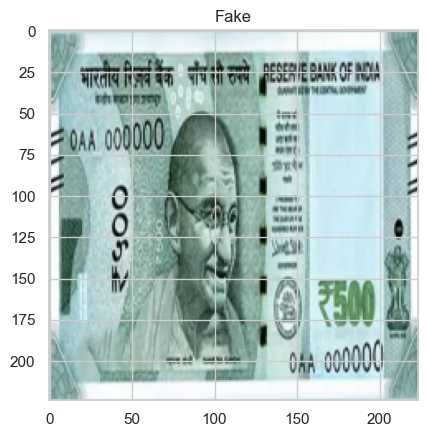

In [30]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'Real')

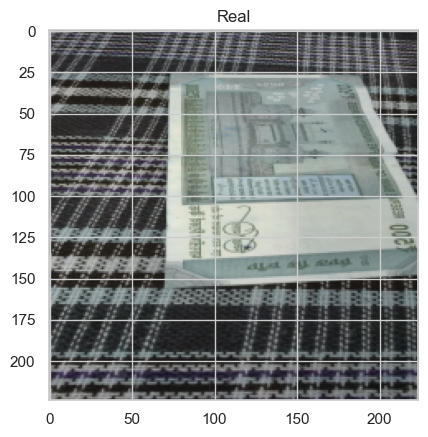

In [31]:
plt.imshow(images[188])
plt.title(class_names[188])

In [32]:
images = np.array(images)

In [33]:
images.shape

(400, 224, 224, 3)

In [34]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [35]:
enc.classes_

array(['Fake', 'Real'], dtype='<U4')

In [36]:
data['class_label'][:10]

17     Fake
10     Real
44     Real
85     Fake
3      Real
101    Fake
115    Fake
91     Fake
8      Real
108    Real
Name: class_label, dtype: object

In [37]:
y[:10]

array([[0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [38]:
y = []
for i in data['class_label']:
    if i == 'Non_Autistic':
        k = [1, 0]
        y.append(k)
    else:
        k = [0, 1]
        y.append(k)

In [39]:
y[:5]

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]

In [40]:
y=np.array(y)
y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [41]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.3, stratify=y, random_state=43)

In [42]:
y_train[:5]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((280, 224, 224, 3), (280, 2), (120, 224, 224, 3), (120, 2))

In [44]:
batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,224, 224, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                        

In [45]:
opt = Adam(learning_rate=0.001)
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
img, x_train, y_train

('C:\\Users\\Deepak L\\Music\\FAkE CURRNCY\\DATASET\\Training\\Real\\r9.jpg',
 array([[[[186, 218, 219],
          [181, 216, 216],
          [178, 215, 215],
          ...,
          [177, 215, 215],
          [180, 216, 216],
          [182, 216, 216]],
 
         [[184, 216, 217],
          [181, 216, 216],
          [179, 217, 217],
          ...,
          [178, 217, 217],
          [181, 217, 217],
          [179, 213, 213]],
 
         [[176, 208, 209],
          [168, 203, 203],
          [175, 213, 213],
          ...,
          [164, 205, 204],
          [167, 205, 205],
          [171, 206, 206]],
 
         ...,
 
         [[142, 177, 176],
          [125, 162, 160],
          [125, 165, 161],
          ...,
          [143, 177, 177],
          [135, 169, 169],
          [149, 182, 183]],
 
         [[140, 174, 173],
          [129, 165, 163],
          [121, 160, 158],
          ...,
          [148, 182, 182],
          [141, 175, 175],
          [149, 182, 182]],
 
      

In [47]:
his = model.fit(x_train, y_train, epochs=20, batch_size=25)

Epoch 1/20
12/12 [==============================] - 65s 5s/step - loss: 1.8417 - accuracy: 0.9536
Epoch 2/20
12/12 [==============================] - 60s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 65s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 64s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 62s 5s/step - loss: 0.0000e+00 - 

In [48]:
score_1 = model.evaluate(x_train, y_train, verbose=0)
print("Test Accuracy : ", score_1[0])

Test Accuracy :  0.0


In [49]:
score_1 = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy : ", score_1[0])

Test Accuracy :  0.0


In [50]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[0]]
results.loc[0] = new

In [51]:
model.save('CNN_model.h5')

C:\Users\Deepak L\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [52]:
results

model  test_accuracy
0   CNN            0.0

1/1 [==============================] - 0s 334ms/step
[[[186 218 219]
  [181 216 216]
  [178 215 215]
  ...
  [177 215 215]
  [180 216 216]
  [182 216 216]]

 [[184 216 217]
  [181 216 216]
  [179 217 217]
  ...
  [178 217 217]
  [181 217 217]
  [179 213 213]]

 [[176 208 209]
  [168 203 203]
  [175 213 213]
  ...
  [164 205 204]
  [167 205 205]
  [171 206 206]]

 ...

 [[142 177 176]
  [125 162 160]
  [125 165 161]
  ...
  [143 177 177]
  [135 169 169]
  [149 182 183]]

 [[140 174 173]
  [129 165 163]
  [121 160 158]
  ...
  [148 182 182]
  [141 175 175]
  [149 182 182]]

 [[140 173 172]
  [125 161 159]
  [129 166 164]
  ...
  [146 180 180]
  [149 182 182]
  [152 183 184]]]
1/1 [==============================] - 0s 84ms/step
[[[183 214 215]
  [185 218 218]
  [182 218 216]
  ...
  [177 217 216]
  [180 218 218]
  [180 216 216]]

 [[185 215 216]
  [174 206 206]
  [176 212 210]
  ...
  [171 211 210]
  [171 209 209]
  [173 210 210]]

 [[170 201 202]
  [145 178 178]
  [149 186 184]
  ...
  [

1/1 [==============================] - 0s 73ms/step
[[[145 148 148]
  [145 149 149]
  [146 151 150]
  ...
  [128 132 132]
  [125 130 129]
  [129 132 132]]

 [[147 152 151]
  [147 152 151]
  [150 155 154]
  ...
  [127 130 130]
  [127 132 131]
  [129 134 132]]

 [[147 149 149]
  [148 153 152]
  [148 153 152]
  ...
  [129 131 131]
  [127 130 130]
  [133 138 136]]

 ...

 [[160 162 162]
  [159 161 161]
  [157 159 159]
  ...
  [152 155 153]
  [151 153 153]
  [150 155 154]]

 [[158 160 160]
  [157 159 159]
  [154 156 156]
  ...
  [147 150 148]
  [153 156 154]
  [153 156 155]]

 [[156 160 159]
  [154 158 157]
  [153 157 157]
  ...
  [152 154 153]
  [153 155 154]
  [151 153 153]]]
1/1 [==============================] - 0s 71ms/step
[[[255 252 254]
  [255 252 254]
  [255 253 255]
  ...
  [255 253 255]
  [255 255 255]
  [255 255 255]]

 [[255 253 255]
  [255 253 255]
  [255 252 254]
  ...
  [255 253 255]
  [255 255 255]
  [255 255 255]]

 [[253 250 252]
  [255 253 255]
  [255 254 255]
  ...
  [2

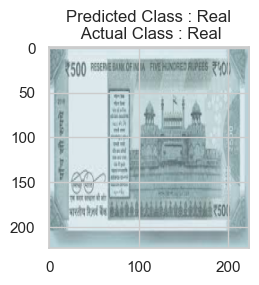

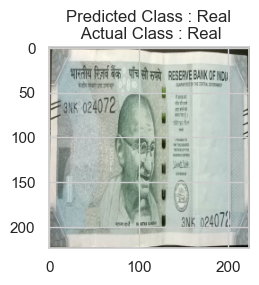

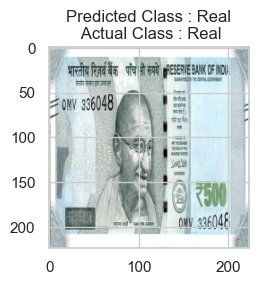

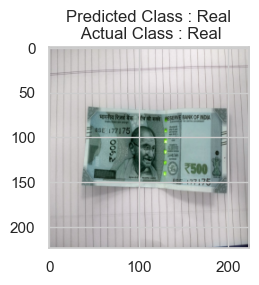

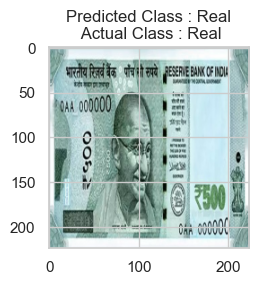

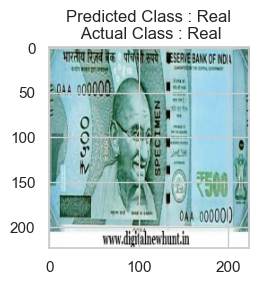

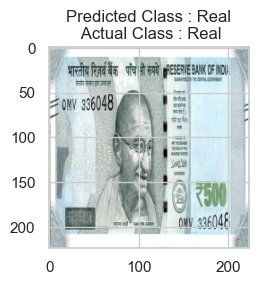

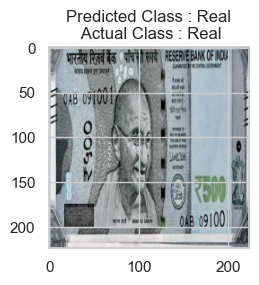

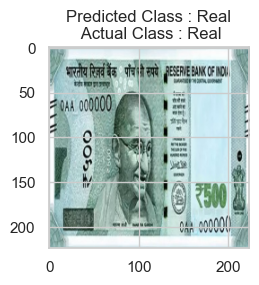

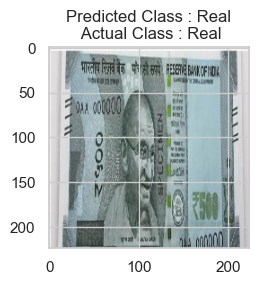

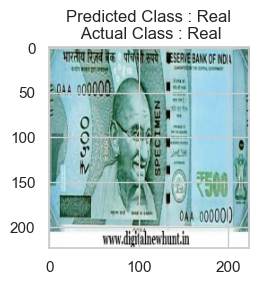

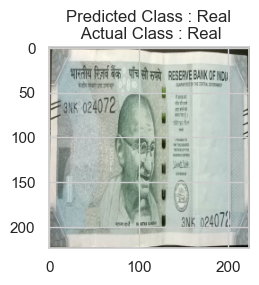

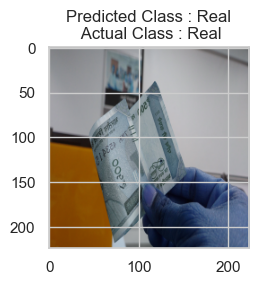

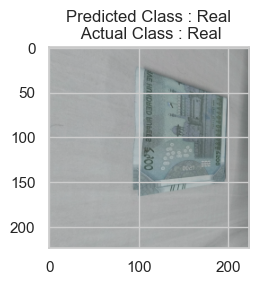

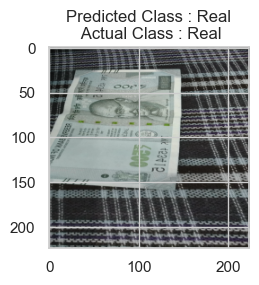

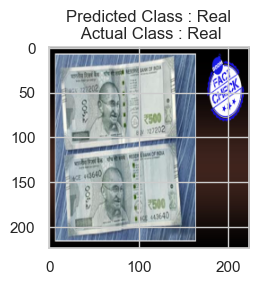

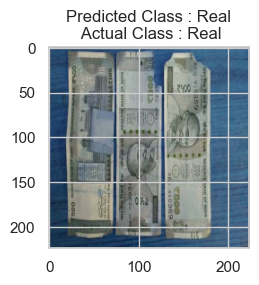

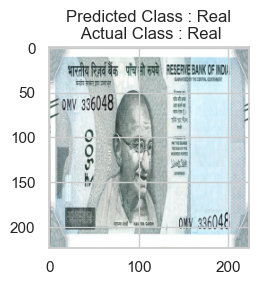

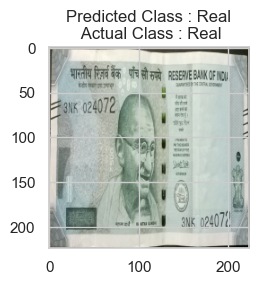

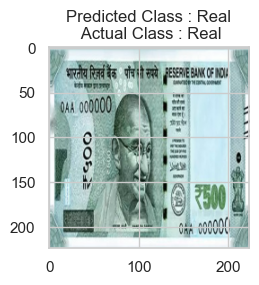

In [53]:
for i in range(20):
    plt.figure(figsize=(15, 15))
    plt.subplot(4, 5, i+1)
    pred = np.argmax(model.predict(np.array([x_train[i]]))[0])
    print(x_train[i])
    act = np.argmax(y_test[i])
    plt.title("Predicted Class : {}\n Actual Class : {}".format(enc.classes_[pred], enc.classes_[act]))
    plt.imshow(x_test[i])
act = np.argmax(y_test[i])
print("Predicted class : {}", format(enc.classes_[pred]))
print("Actual Class : {}", format(enc.classes_[act]))

plt.imshow(x_test[i])

In [54]:
from keras.applications.vgg16 import VGG16

In [55]:
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [56]:
vgg.trainable = False

In [57]:
model_1 = Sequential()
model_1.add(vgg)
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(2, activation='softmax'))

In [58]:
opt = Adam(lr=0.001)
optimizer = tf.keras.optimizers.legacy.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_1.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

C:\Users\Deepak L\anaconda3\Lib\site-packages\keras\src\optimizers\legacy\rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [59]:
his2= model_1.fit(x_train, y_train, epochs = 20, validation_data = (x_test,y_test),batch_size = 28)

Epoch 1/20
10/10 [==============================] - 91s 9s/step - loss: 1.5381 - accuracy: 0.9107 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
10/10 [==============================] - 90s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
10/10 [==============================] - 90s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 90s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
10/10 [==============================] - 91s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
10/10 [==============================] - 90s 9s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 93s 10s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0

In [60]:
score_3 = model_1.evaluate(x_train, y_train, verbose=0)
print('train accuracy:', score_3[1])

train accuracy: 1.0


In [61]:
score_4 = model_1.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_4[1])

Test accuracy: 1.0


In [62]:
model.save('VGG_model.h5')

C:\Users\Deepak L\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 287ms/step


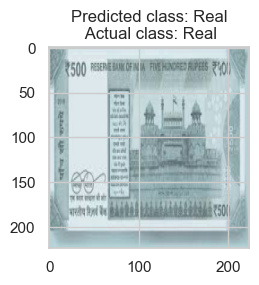

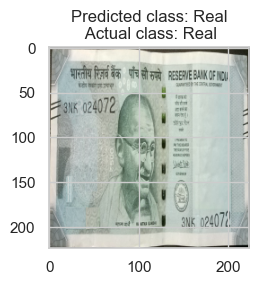

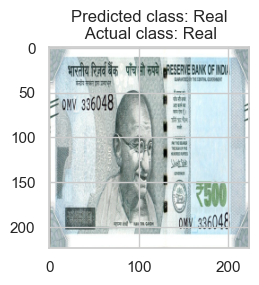

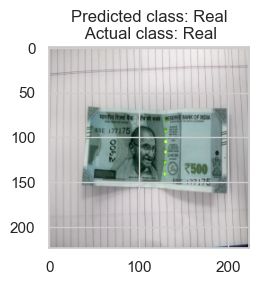

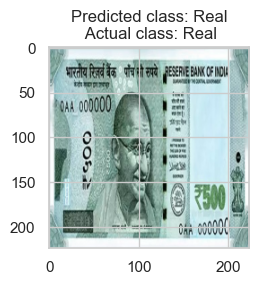

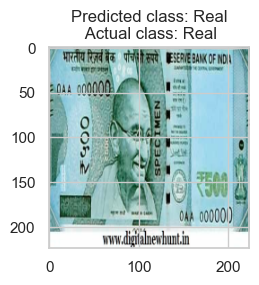

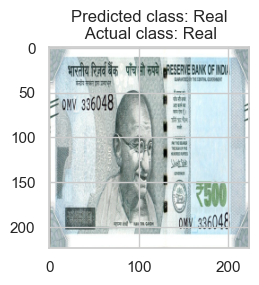

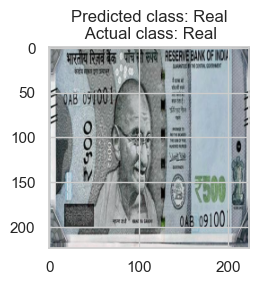

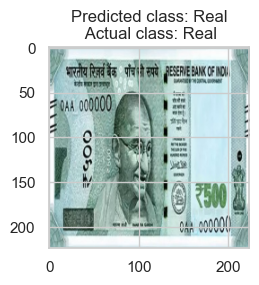

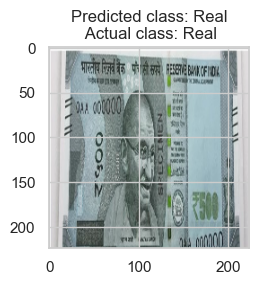

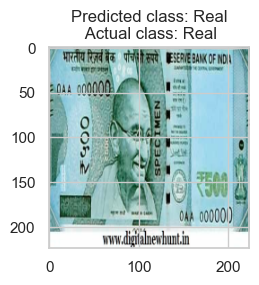

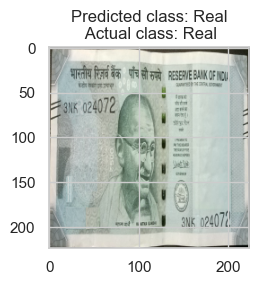

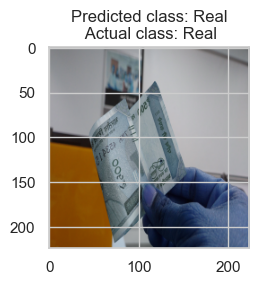

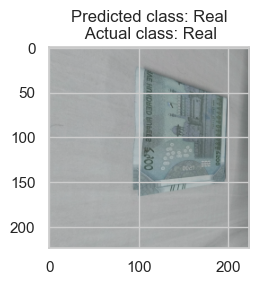

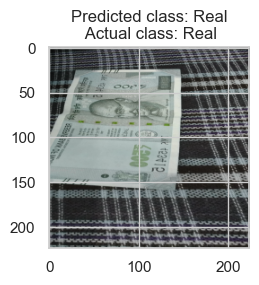

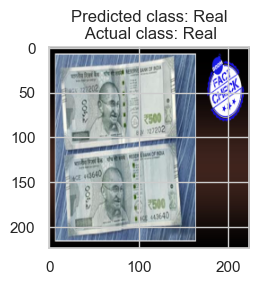

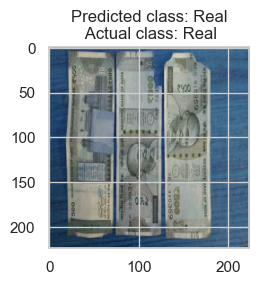

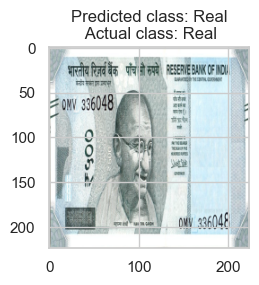

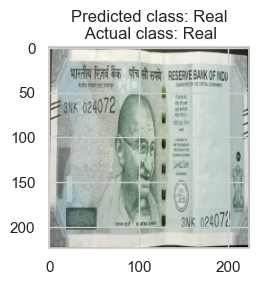

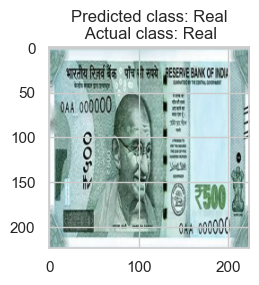

In [63]:
for i in range(20):
  plt.figure(figsize=(15,15))
  plt.subplot(4,5,i+1)
  pred = np.argmax(model_1.predict(np.array([x_test[i]]))[0])
  act = np.argmax(y_test[i])
  plt.title("Predicted class: {}\n Actual class: {}".format(enc.classes_[pred],enc.classes_[act]))
  plt.imshow(x_test[i])

In [64]:
results = pd.DataFrame(columns=['model', 'test_accuracy'])
new = ['CNN', score_1[0]]
results.loc[0] = new

In [65]:
new = ['VGG', score_4[1]]
results.loc[1] = new

In [66]:
results

model  test_accuracy
0   CNN            0.0
1   VGG            1.0